<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Introduction_to_Statistical_Learning/DataStory_Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse Advertising Data
## Ask Questions
General | Specific
--- | ---
Can we determine if a relationship exists between predictors and response? | (1) Is there a relationship between advertising budget and sales?
How strong is this relationship? | (2) How strong is the relationship between advertising budget and sales?
Which predictors are related to response? | (3) Which media are associated with sales?
How large is the association between each predictor and response? | (4) How large is the association between each medium and sales?
How accurate are predictions once model is fit? | (5) How accurately can we predict future sales?
Is a linear model appropriate? | (6) Is the relationship linear?
Are there interaction effects? | (7) Is there synergy among the advertising media?

## Wrangle Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.polynomial import Polynomial
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = 'https://raw.githubusercontent.com/tdpetrou/Machine-Learning-Books-With-Python/master/Introduction%20to%20Statistical%20Learning/data/'
adv = pd.read_csv(path+'Advertising.csv')
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Explore Data

poly([7.03259355 0.04753664])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


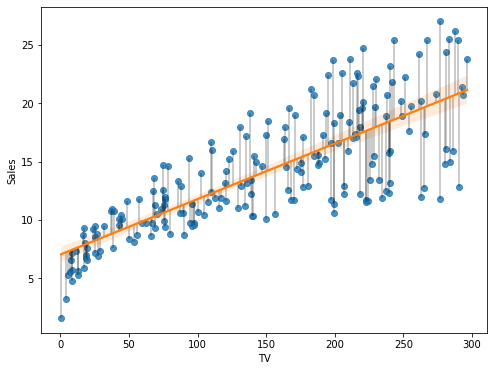

In [3]:
# This forms part of old polynomial API. Since version 1.4, the new polynomial API defined in numpy.polynomial is preferred.
# fit = np.polyfit(adv['TV'], adv['Sales'], deg=1)
# y_hat = fit[1] + adv['TV'] * fit[0]

# Use `convert()` to get the coefficients in the unscaled data domain
fit = Polynomial.fit(adv['TV'], adv['Sales'], deg = 1).convert()
print(fit)
y_hat = fit.coef[0] + fit.coef[1] * adv['TV'] 

plt.figure(figsize=(8, 6))
sns.regplot('TV', 'Sales', data=adv, line_kws={'color':'tab:orange'})
plt.vlines(adv['TV'], y_hat, adv['Sales'], lw = .4);

In [4]:
import statsmodels.api as sm
# Using numpy arrays instead of formula
adv = sm.add_constant(adv)
print(sm.OLS(adv['Sales'], adv[['const', 'TV']]).fit().summary())
adv.drop(columns='const', inplace=True)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           1.47e-42
Time:                        13:59:34   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [5]:
# Using R-style formulas with formula.api
print(smf.ols('Sales ~ TV', data=adv).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           1.47e-42
Time:                        13:59:34   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

(Ref ISL Table 3.1) Coefficients of the least squares model for the regression of number of units sold on TV advertising budget. An increase of $1,000 in the TV advertising budget is associated with an increase in sales by around 50 units.

In [6]:
# Print model summaries for other two predictors
print(smf.ols('Sales ~ Radio', data=adv).fit().summary())
print(smf.ols('Sales ~ Newspaper', data=adv).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           4.35e-19
Time:                        13:59:35   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

(Ref ISL Table 3.3) More simple linear regression models for the `Advertising` data. A $1,000 increase in spending on radio advertising is associated with an average increase in sales by around 203 units, while the same increase in spending on newspaper advertising is associated with an average increse in sales by around 55 units.

## Draw Conclusions
###  (1) Is there a relationship between advertising budget and sales?

> This question can be answered by fitting a multiple regression model of *Sales* onto *TV*, *Radio*, and *Newspaper*, as in $(20)$ and testing the  hypothesis $H_0: \beta_{TV} = \beta_{Radio} = \beta_{Newspaper} = 0$. In Section 3.2.2,  we showed that the $F$-statistic can be used to determine whether or not we should reject this null hypothesis. In this case the $p$-value corresponding to the $F$-statistic in Table 3.6 is very low, indicating  clear evidence of a relationship between advertising and sales.

We can run three separate simple linear regressions, each of which uses a different advertising medium as a predictor. See chapter *Explore Data* above. However, the approach of fitting a separate simple linear regression model for each predictor is not entirely satisfactory:
- It is unclear how to make a single prediction of sales given the three advertising media budgets, since each of the budgets is associated with a separate regression equation.
- Each of the three regression equations ignores the other two media in forming estimates for the regression coefficients. If the media budgets are correlated with each other in the 200 markets in our data set, then this can lead to very misleading estimates of the association between each media budget and sales.

Instead of fitting a separate simple linear regression model for each predictor, a better approach is to extend the simple linear regression model $(3.5)$ so that it can directly accomodate multiple predictors. We can do this by giving each predictor a separate slope coefficient in a single model:
$$\text{Sales} = \beta_0 + \beta_{TV}\times\text{TV} + \beta_{Radio}\times\text{Radio} + \beta_{Newpaper}\times\text{Newspaper} + \epsilon,\qquad(20)$$ 

In [7]:
res = smf.ols('Sales ~ TV + Radio + Newspaper', data=adv).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        13:59:35   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

For a given amount of TV and newspaper advertising, spending additional \$1,000 on radio advertising is associated with approximately 189 units of additional sales. Comparing these coefficient estimates to those computed individually, we notice that the multiple regression coefficient estimates for *TV* and *Radio* are pretty similar to the simple linear regression coefficient estimates. However, while *Newspaper* regression coefficient estimate in simple linear model was significantly non-zero, the coefficient estimate for *Newspaper* in multiple regression model is close to zero, and the corresponding $p$-value is no longer significant, with a value around $0.86$. This illustrates that the simple and multiple regression coefficients can be quite different. This difference stems from the fact that in the simple regression case, the slope term represents the average increase in product sales associated with a unit increase in newspaper advertising, ignoring other predictors such as *TV* and *Radio*. By contrast, in the multiple regression setting, the coefficent for *Newspaper* represents the average increase in product sales associated with increasing newspaper spending by one unit while holding *TV* and *Radio* fixed.

Consider the correlation matrix for the three predictor variables and response variable:

In [8]:
adv.corr().round(3)

,TV,Radio,Newspaper,Sales
TV,1.000,0.055,0.057,0.782
Radio,0.055,1.000,0.354,0.576
Newspaper,0.057,0.354,1.000,0.228
Sales,0.782,0.576,0.228,1.000


Notice that the correlation between *Radio* and *Newspaper* is $0.35$. This indicates that markets with high newspaper advertising tend also have high radio advertising. Thus, *Newspaper* gets "credit" for the association between *Radio* and *Sales*.

To determine whether there is a relationship between the response and the predictors we test the null hypothesis, 
$$H_0:\beta_{TV}=\beta_{Radio}=\beta_{Newspaper}=0$$
versus the alternative
$$H_a:\text{at least one }\beta_{j\in\{TV, Radio, Newspaper\}} \text{ is non-zero}.$$
This hypothesis test is performed by computing $F$-statistic and $p$-value of the $F$-statistic:

In [9]:
print(f'The F-statistic of the model is {res.fvalue:.1f}. The p-value of this F-statistic is {res.f_pvalue:.2e}.')

The F-statistic of the model is 570.3. The p-value of this F-statistic is 1.58e-96.


For the advertising data, $p$-value associated with the $F$-statistic is essentially zero, so we have extremely strong evidence that at least one of the media is associated with increased *Sales*.

Now we can look at $t$-statistic and corresponding $p$-values of individual predictors. These provide information about whether each individual predictor is related to the response, after adjusting for the other predictors. Each $t$-statistic is the square root of the corresponding $F$-statistic of $F$-test that omits that single variable from the model, leaving all the others in. So it reports the *partial effect* of adding that variable to the model.

###  (2) How strong is the relationship between advertising budget and sales?

###  (3) Which media are associated with sales?

###  (4) How large is the association between each medium and sales?

###  (5) How accurately can we predict future sales?

###  (6) Is the relationship linear?

###  (7) Is there synergy among the advertising media?

## References
- [np.polyfit: transition guide](https://numpy.org/doc/stable/reference/routines.polynomials.html)
- [np.Polynomial](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.html#numpy.polynomial.polynomial.Polynomial)